# Gaussian Processes

In [21]:
import numpy as np
import matplotlib.pylab as plt

In [269]:
# function to estimate
def mistery_function(x):
    return 2*x**2 - 3*x +5 + np.random.normal(loc=0, scale=1, size=x.size)
# kernel
def kernel(t1, t2, params):
    # a * e^(b/2 * (t1-t2)^2)
    return params[0] * np.exp(-0.5*params[1]*np.subtract.outer(t1,t2)**2)

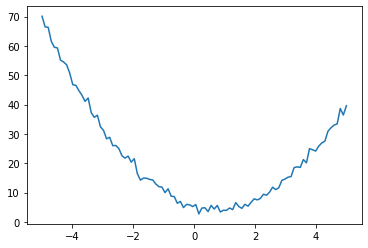

In [270]:
n_samples = 100
x = np.linspace(-5,5, n_samples)
y = mistery_function(x)
plt.plot(x,y)
plt.show()

Now need to implement the update after the arrival of one new sample


In [271]:
def conditional(x_new, x, y, params):
    B = kernel(x_new, x, params)
    C = kernel(x, x, params)
    A = kernel(x_new, x_new, params)
    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
    return(mu.squeeze(), sigma.squeeze())

In [272]:
params = [1,2]
test_samples = 1000
# unknown points
x = np.linspace(-5,5,test_samples) 
# prior belief
mu = np.zeros(test_samples)
sigma = kernel(x,x, params)
# new knowledge
#x_new = np.array([1, 2, -5])
train_samples = 25
x_new = np.linspace(-5,5,train_samples)
y_new = mistery_function(x_new)

# x is test set, y is train set
cov_xx = sigma
cov_xy = kernel( x, x_new, params) # it's a colum
# the noise works like a regularization term
cov_yy = kernel(x_new, x_new, params) + np.random.normal(scale=0.0001)*np.identity(train_samples)


In [273]:
new_mu = mu + cov_xy.dot(np.linalg.inv(cov_yy)).dot(y_new)
new_cov = cov_xx - cov_xy.dot(np.linalg.inv(cov_yy)).dot(cov_xy.transpose())

<ErrorbarContainer object of 3 artists>

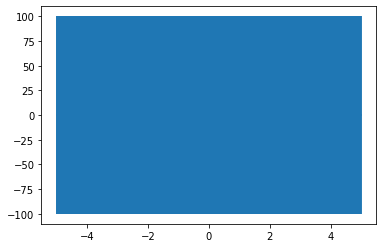

In [274]:
plt.errorbar(x, mu, np.diag(sigma), capsize=0)

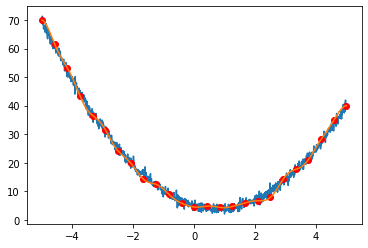

In [275]:
plt.plot(x,mistery_function(x))
plt.errorbar(x, new_mu, np.diag(new_cov), capsize=0)
plt.plot(x_new, y_new, "ro")

In [249]:
#prediction on unseen data is using a different prior
